In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras.utils import to_categorical
import csv
import re
import numpy as np

In [2]:
# "Words" contains the subset of words we make predictions for. 
words =  np.array(['ja', 'hvad', 'nej', 'nu', 'mange', 'fordi', 'koebe', 'tid', 'soed'])

label_map = {label:num for num, label in enumerate(words)}

# Base path leading to directory containing folders with videos for all signs defined in "words" array
base_path = "../VRDataset"

# Path for saving processed Data Arrays
proc_data_path = "../VR_exportdata/"

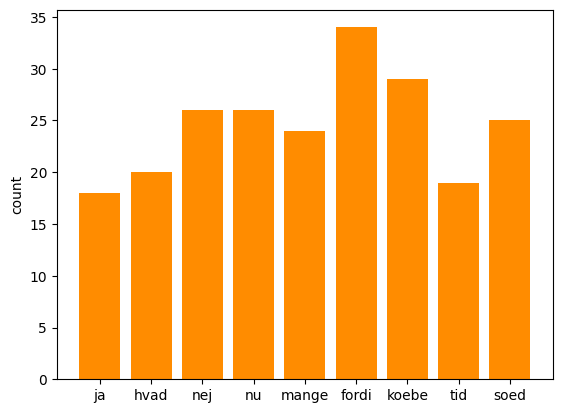

In [22]:
data = (18, 20, 26, 26, 24, 34, 29, 19, 25)
plt.bar(words, data, color="darkorange")
plt.ylabel('count')
plt.show()

In [12]:
def import_data(path, words, label_map):
    # Keypoint_list_of_arrays is a python list containing "video amount" of NP arrays.
    data_list = []
    labels = []
    for word in words:
        dir_path = path + "/" + str(word) + "/"
        tmp = []
        for filename in os.listdir(dir_path):
            if (filename.endswith('.csv')): 
                file = open(os.path.join(dir_path, filename))
                file = file.read()
                file = file.replace("\n", ",")
                data = re.sub(r"[\([{})\]]", "", file)

                npdata = np.fromstring(data, dtype=float, sep=',')
                npdata = npdata.reshape(int(len(npdata)/144), 144)

                num_rows, num_cols = npdata.shape
                npdata = npdata[:-int(num_rows - 120)]

                data_list.append(npdata)
                labels.append(label_map[word])
        
    return data_list, labels


In [13]:
data, labels = import_data(base_path, words, label_map)

npdata = np.stack(data)
npdata.shape

(213, 120, 144)

In [14]:
for i in range(len(data)):
    print(data[i].shape)

print(labels)

(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)
(120, 144)

In [15]:
X = np.array(npdata)
y = to_categorical(labels).astype(int)

np.save(str(proc_data_path) + 'X_dataVR', X)
np.save(str(proc_data_path) + 'y_dataVR', y)